# <div style="text-align:center"> $B^{\pm} \xrightarrow{} K^+ K^- \pi^{\pm}$ </div>

In [1]:
#include <iostream>
#include <string>
#include <stdio.h>

TChain *B2HHH = new TChain("DecayTree");
B2HHH->Add("data/B2HHH_MagnetUp.root");
B2HHH->Add("data/B2HHH_MagnetDown.root");

B2HHH->Print()

******************************************************************************
*Chain   :DecayTree : data/B2HHH_MagnetUp.root                               *
******************************************************************************
******************************************************************************
*Tree    :DecayTree : Tree continaing data for B- --> h-h+h- decays          *
*Entries :  3420295 : Total =       629522894 bytes  File  Size =  444718406 *
*        :          : Tree compression factor =   1.42                       *
******************************************************************************
*Br    0 :B_FlightDistance : B_FlightDistance/D                              *
*Entries :  3420295 : Total  Size=   27370973 bytes  File Size  =   24630500 *
*Baskets :       72 : Basket Size=    1873408 bytes  Compression=   1.05     *
*............................................................................*
*Br    1 :B_VertexChi2 : B_VertexChi2/D             

### Declaring and defining variables

In [2]:
Double_t B_FlightDistance;          Double_t B_VertexChi2;

Int_t H1_isMuon;         Int_t H2_isMuon;          Int_t H3_isMuon;
Int_t H1_Charge;         Int_t H2_Charge;          Int_t H3_Charge;
Double_t H1_IPChi2;      Double_t H2_IPChi2;       Double_t H3_IPChi2;
Double_t H1_PX;          Double_t H2_PX;           Double_t H3_PX;
Double_t H1_PY;          Double_t H2_PY;           Double_t H3_PY;
Double_t H1_PZ;          Double_t H2_PZ;           Double_t H3_PZ;
Double_t H1_ProbPi;      Double_t H2_ProbPi;       Double_t H3_ProbPi;
Double_t H1_ProbK;       Double_t H2_ProbK;        Double_t H3_ProbK;

B2HHH->SetBranchAddress("B_FlightDistance", &B_FlightDistance);    B2HHH->SetBranchAddress("B_VertexChi2", &B_VertexChi2);

B2HHH->SetBranchAddress("H1_isMuon", &H1_isMuon);     B2HHH->SetBranchAddress("H2_isMuon", &H2_isMuon);     B2HHH->SetBranchAddress("H3_isMuon", &H3_isMuon);
B2HHH->SetBranchAddress("H1_Charge", &H1_Charge);     B2HHH->SetBranchAddress("H2_Charge", &H2_Charge);     B2HHH->SetBranchAddress("H3_Charge", &H3_Charge);
B2HHH->SetBranchAddress("H1_IPChi2", &H1_IPChi2);     B2HHH->SetBranchAddress("H2_IPChi2", &H2_IPChi2);     B2HHH->SetBranchAddress("H3_IPChi2", &H3_IPChi2);
B2HHH->SetBranchAddress("H1_PX", &H1_PX);             B2HHH->SetBranchAddress("H2_PX", &H2_PX);             B2HHH->SetBranchAddress("H3_PX", &H3_PX);
B2HHH->SetBranchAddress("H1_PY", &H1_PY);             B2HHH->SetBranchAddress("H2_PY", &H2_PY);             B2HHH->SetBranchAddress("H3_PY", &H3_PY);
B2HHH->SetBranchAddress("H1_PZ", &H1_PZ);             B2HHH->SetBranchAddress("H2_PZ", &H2_PZ);             B2HHH->SetBranchAddress("H3_PZ", &H3_PZ);
B2HHH->SetBranchAddress("H1_ProbPi", &H1_ProbPi);     B2HHH->SetBranchAddress("H2_ProbPi", &H2_ProbPi);     B2HHH->SetBranchAddress("H3_ProbPi", &H3_ProbPi);
B2HHH->SetBranchAddress("H1_ProbK", &H1_ProbK);       B2HHH->SetBranchAddress("H2_ProbK", &H2_ProbK);       B2HHH->SetBranchAddress("H3_ProbK", &H3_ProbK);

//---------OTHER DEFINITIONS

// B_m = 5279.38 // B meson mass in MeV
double Pi_m = 139.57039; // MeV
double K_m  = 493.677;   // MeV
double D0m = 1864.84;    // MeV

float prob_pi = 0.5;
float prob_ka = 0.5;

int nentries, nbytes, i;
nentries = (Int_t)B2HHH->GetEntries();

## ParticleID selection and hadrons momenta

I don't need to consider the case where H1 is the Pion, because then H2 and H3 will be Kaons with equal charge. 

In [3]:
int c1 = 0; int c2 = 0; int c3 = 0; int c4 = 0; int c5 = 0; int c6 = 0; 

int bin = 30;
int suplim = 140000;

TH1F *momentumPion = new TH1F("momentumPion","momentumPion; p(MeV); Events",bin,0,suplim);
TH1F *momentumKaon1 = new TH1F("momentumKaon1","momentumKaon1; p(MeV); Events",bin,0,suplim);
TH1F *momentumKaon2 = new TH1F("momentumKaon2","momentumKaon2; p(MeV); Events",bin,0,suplim);
TH1F *h_Bmass = new TH1F("h_Bmass","Bmass; m(MeV); Events",60,3000,7000);

for (i = 0; i < nentries; i++)
{
    nbytes = B2HHH->GetEntry(i); 
    
    if(H1_isMuon == 1 || H2_isMuon == 1 || H3_isMuon == 1) continue;
    if(H1_ProbPi > prob_pi || H1_ProbK < prob_pi) continue; // H1 MUST BE A KAON
    
    TLorentzVector Pion  = TLorentzVector(); 
    TLorentzVector Kaon1  = TLorentzVector();  Kaon1.SetXYZM(H1_PX, H1_PY, H1_PZ,K_m);  momentumKaon1->Fill(Kaon1.P(),1); 
    TLorentzVector Kaon2  = TLorentzVector();
    
    if(H2_ProbPi > prob_pi && H2_ProbK < prob_ka){ //----- H2 IS THE PION
        if(H3_ProbK  < prob_ka || H3_ProbPi > prob_pi) continue;
        Pion.SetXYZM(H2_PX, H2_PY, H2_PZ,Pi_m);        momentumPion->Fill(Pion.P(),1);        
        Kaon2.SetXYZM(H3_PX, H3_PY, H3_PZ,K_m);        momentumKaon2->Fill(Kaon2.P(),1);  c2++; 
    }
    if(H3_ProbPi > prob_pi && H3_ProbK < prob_ka){ //----- H3 IS THE PION
        if(H2_ProbK  < prob_ka || H2_ProbPi > prob_pi) continue;
        Pion.SetXYZM(H3_PX, H3_PY, H3_PZ,Pi_m);        momentumPion->Fill(Pion.P(),1);
        Kaon2.SetXYZM(H2_PX, H2_PY, H2_PZ,K_m);        momentumKaon2->Fill(Kaon2.P(),1);  c3++;
    }   
    double Bmass = (Pion + Kaon1 + Kaon2).M();     h_Bmass->Fill(Bmass,1);
}

In [4]:
cout << c1 << endl;
cout << c2 << endl;
cout << c3 << endl;
cout << c1 + c2 + c3 << endl;

0
52785
38085
90870


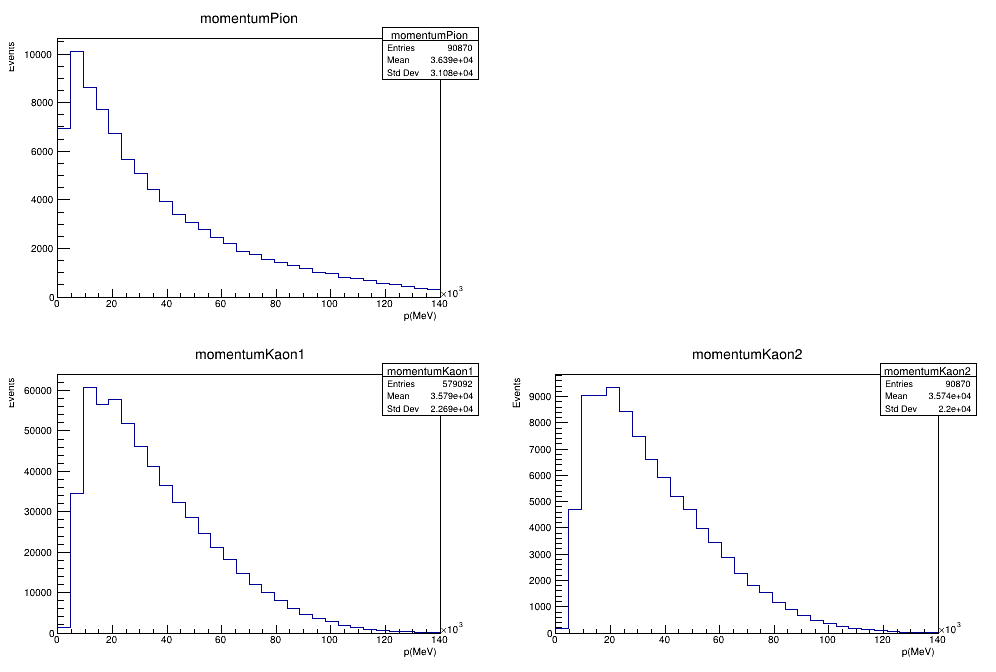

In [5]:
auto c1 = new TCanvas("c1","c1",1000,700);    c1->Divide(2,2);
c1->cd(1); momentumPion->Draw();
c1->cd(3); momentumKaon1->Draw();
c1->cd(4); momentumKaon2->Draw();
c1->Draw()

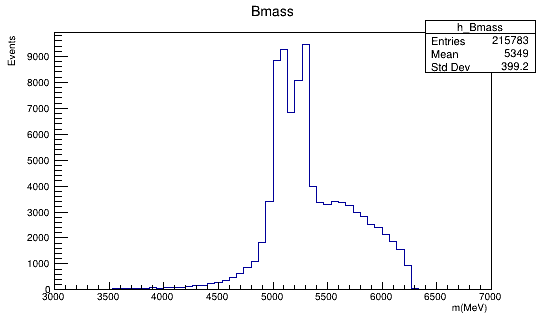

In [6]:
TCanvas *canvas = new TCanvas("Canvas","",550,350);
h_Bmass->Draw();
canvas->Draw()

--------------

# 2-body objects

In [7]:
int Bplus = 0; int Bminus = 0; 

binsn = 100;
infl = 1500;
supl = 2000;

TH1F *h_Mpi_plus = new TH1F("h_Mpi_plus","Mpi ; m(MeV); Events",60,infl,supl);
TH1F *h_Mka_plus = new TH1F("h_Mka_plus","Mka ; m(MeV); Events",60,infl,supl);
TH1F *h_Mpi_minus = new TH1F("h_Mpi_minus","Mpi minus; m(MeV); Events",60,infl,supl);
TH1F *h_Mka_minus = new TH1F("h_Mka_minus","Mka minus; m(MeV); Events",60,infl,supl);

for (i = 0; i < nentries; i++)
{
    nbytes = B2HHH->GetEntry(i); 
    
    if(H1_isMuon == 1 || H2_isMuon == 1 || H3_isMuon == 1) continue;
    if(H1_ProbPi > prob_pi || H1_ProbK < prob_pi) continue; // H1 MUST BE A KAON
    TLorentzVector Pion  = TLorentzVector(); 
    TLorentzVector Kaon1  = TLorentzVector();  Kaon1.SetXYZM(H1_PX, H1_PY, H1_PZ,K_m);  
    TLorentzVector Kaon2  = TLorentzVector();
        
    if(H2_ProbPi > prob_pi && H2_ProbK < prob_ka){ //----- H2 IS THE PION
        if(H3_ProbK  < prob_ka || H3_ProbPi > prob_pi) continue;
        Pion.SetXYZM(H2_PX, H2_PY, H2_PZ,Pi_m);  
        Kaon2.SetXYZM(H3_PX, H3_PY, H3_PZ,K_m);  
        double Mpi = (Pion + Kaon1).M();        
        double Mka = (Kaon1 + Kaon2).M();       
        if(H1_Charge == -1){ //------------ B+ CASE
            h_Mpi_plus->Fill(Mpi,1); 
            h_Mka_plus->Fill(Mka,1);   Bplus++;
        }
        if(H1_Charge == 1){ //------------ B- CASE
            h_Mpi_minus->Fill(Mpi,1); 
            h_Mka_minus->Fill(Mka,1);  Bminus++;
        }    

    }
    if(H3_ProbPi > prob_pi && H3_ProbK < prob_ka){ //----- H3 IS THE PION
        if(H2_ProbK  < prob_ka || H2_ProbPi > prob_pi) continue;
        Pion.SetXYZM(H3_PX, H3_PY, H3_PZ,Pi_m);  
        Kaon2.SetXYZM(H2_PX, H2_PY, H2_PZ,K_m);  
        double Mpi = (Pion + Kaon1).M();        
        double Mka = (Kaon1 + Kaon2).M();       
        if(H1_Charge == -1){ //------------ B+ CASE
            h_Mpi_plus->Fill(Mpi,1); 
            h_Mka_plus->Fill(Mka,1);   Bplus++;
        }
        if(H1_Charge == 1){ //------------ B- CASE
            h_Mpi_minus->Fill(Mpi,1); 
            h_Mka_minus->Fill(Mka,1);  Bminus++;
        }                
    }
}

cout << "B+ events:" << Bplus << endl;
cout << "B- events:" << Bminus << endl;
cout << "Total:" << Bplus + Bminus << endl;

B+ events:46018
B- events:44852
Total:90870


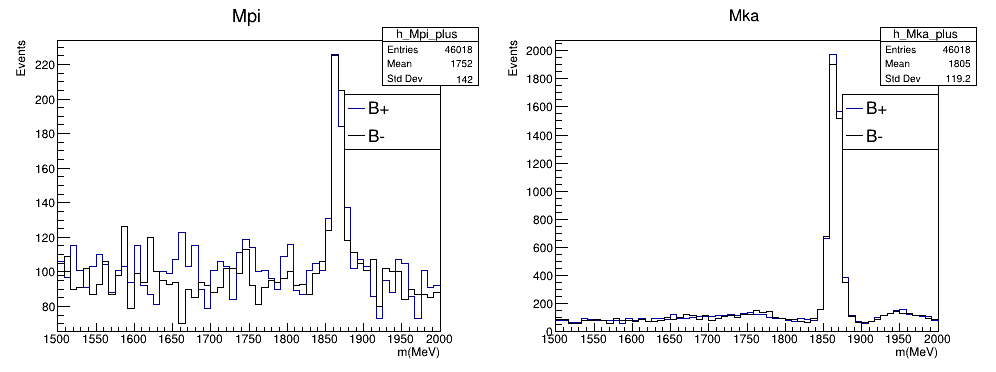

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [8]:
auto c1 = new TCanvas("c1","c1",1000,400);  c1->Divide(2,1);

c1->cd(1);
h_Mpi_plus->Draw();
h_Mpi_minus->Draw("samehist");
h_Mpi_minus->SetLineColor(1);
TLegend *leg = new TLegend(0.7,0.6,0.9,0.75);
leg->AddEntry(h_Mpi_plus, "B+", "l"); leg->AddEntry(h_Mpi_minus, "B-", "l"); leg->Draw();

c1->cd(2);
h_Mka_plus->Draw();
h_Mka_minus->Draw("samehist");
h_Mka_minus->SetLineColor(1);
TLegend *leg2 = new TLegend(0.7,0.6,0.9,0.75);
leg2->AddEntry(h_Mka_plus, "B+", "l"); leg2->AddEntry(h_Mka_minus, "B-", "l"); leg2->Draw();

c1->Draw();

------------

# Taking out the $D_0$ mass and making Dalitz Plots

Defining histograms and some parameters

In [17]:
infl = 500;         supl = 6000;
double thresh = 30.;  // D0 exclusion threshold

TH1F *h_PT = new TH1F("h_PT","h_PT ; Pt(MeV); Events",60,1000,8000);
TH1F *h_Mpi_plus = new TH1F("h_Mpi_plus","Mpi ; m(MeV); Events",60,infl,supl);
TH1F *h_Mka_plus = new TH1F("h_Mka_plus","Mka ; m(MeV); Events",60,infl,supl);
TH1F *h_Mpi_minus = new TH1F("h_Mpi_minus","Mpi minus; m(MeV); Events",60,infl,supl);
TH1F *h_Mka_minus = new TH1F("h_Mka_minus","Mka minus; m(MeV); Events",60,infl,supl);

int dpxbins = 14;  int dpybins = 14;  //-------- DALITZ PLOT BINS

TH2F *h_Bplus = new TH2F("h_Bplus","B^{+}; Mka^{2}; Mpi^{2}",dpxbins,0,35, dpybins, 0, 35);
TH1F *h_MpiSQ_plus = new TH1F("h_Mpi_plus","Mpi^{2} ; m^{2}(GeV^{2}); Events",60,0,35);
TH2F *h_Bminus = new TH2F("h_Bminus","B^{-}; Mka^{2}; Mpi^{2}",dpxbins,0,35, dpybins, 0, 35);
TH1F *h_MpiSQ_minus = new TH1F("h_Mpi_minus","Mpi minus; m^{2}(GeV^{2}); Events",60,0,35);
TH1F *h_MkaSQ_plus = new TH1F("h_Mka_plus","Mka^{2} ; m^{2}(GeV^{2}); Events",60,0.8,2.8);
TH1F *h_MkaSQ_minus = new TH1F("h_Mka_minus","Mka minus; m^{2}(GeV^{2}); Events",60,0.8,2.8);

Warning in <TROOT::Append>: Replacing existing TH1: h_PT (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_Mpi_plus (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_Mka_plus (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_Mpi_minus (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_Mka_minus (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_Bplus (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_Mpi_plus (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_Bminus (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_Bminus (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_Bminus (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_Mpi_minus (Potential memory leak).
Warning in <TROOT::Append>: Replacing existi

Fill function

In [18]:
void func(TLorentzVector Pion, TLorentzVector Kaon1, TLorentzVector Kaon2)
{
    double Mpi = (Pion + Kaon1).M();
    double Mka = (Kaon1 + Kaon2).M();
    double PT = (Pion + Kaon1 + Kaon2).Pt();  h_PT->Fill(PT,1);
    if(PT > 1700) {
        if( (Mpi < D0m - thresh || Mpi > D0m + thresh) && (Mka < D0m - thresh || Mka > D0m + thresh) ){
            if(H1_Charge == -1){ //------------ B+ CASE
                h_Mpi_plus->Fill(Mpi,1);
                h_Mka_plus->Fill(Mka,1);
                h_Bplus->Fill(Mka*Mka/1e6,Mpi*Mpi/1e6);
                h_MpiSQ_plus->Fill(Mpi*Mpi/1e6,1);
                h_MkaSQ_plus->Fill(Mka*Mka/1e6,1);                     
            }
            if(H1_Charge == 1){  //------------ B- CASE
                h_Mpi_minus->Fill(Mpi,1);
                h_Mka_minus->Fill(Mka,1);         
                h_Bminus->Fill(Mka*Mka/1e6,Mpi*Mpi/1e6);
                h_MpiSQ_minus->Fill(Mpi*Mpi/1e6,1); 
                h_MkaSQ_minus->Fill(Mka*Mka/1e6,1);                           
            }                        
        }              
    }
}

main logic

In [19]:
double above_this = 0.7;    double below_this = 0.3;

for (i = 0; i < nentries; i++)
{
    nbytes = B2HHH->GetEntry(i); 
    
    if(H1_isMuon == 1 || H2_isMuon == 1 || H3_isMuon == 1) continue;  // NO MUONS
    if(H1_ProbPi > 0.3 || H1_ProbK < 0.7) continue;                   // H1 MUST BE A KAON

    TLorentzVector Pion  = TLorentzVector(); 
    TLorentzVector Kaon1  = TLorentzVector();   Kaon1.SetXYZM(H1_PX, H1_PY, H1_PZ,K_m);
    TLorentzVector Kaon2  = TLorentzVector();

    if(H2_ProbPi > above_this && H2_ProbK < below_this){      //----- H2 IS THE PION
        if(H3_ProbK  > above_this && H3_ProbPi < below_this) {
            Pion.SetXYZM(H2_PX, H2_PY, H2_PZ,Pi_m);
            Kaon2.SetXYZM(H3_PX, H3_PY, H3_PZ,K_m);
            func(Pion,Kaon1,Kaon2);
        }
    }
    else if(H3_ProbPi > above_this && H3_ProbK < below_this){ //----- H3 IS THE PION
        if(H2_ProbK  > above_this && H2_ProbPi < below_this) {
            Pion.SetXYZM(H3_PX, H3_PY, H3_PZ,Pi_m);
            Kaon2.SetXYZM(H2_PX, H2_PY, H2_PZ,K_m);
            func(Pion,Kaon1,Kaon2);
        }            
    }        
}

----------------

Plotting

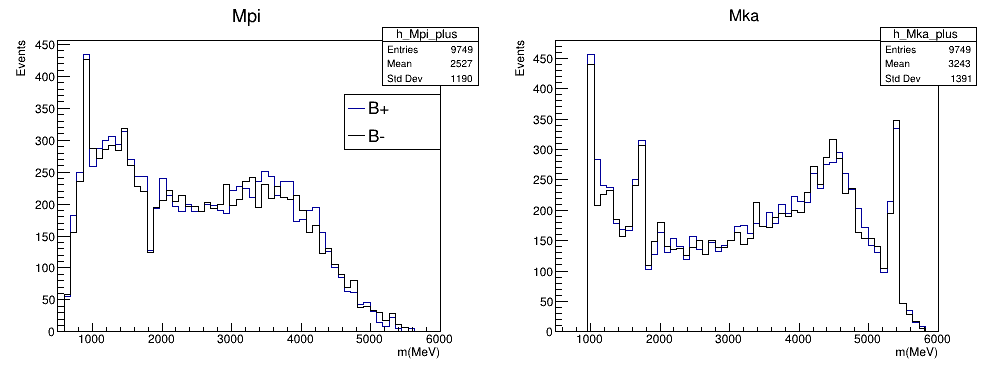

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [20]:
auto c1 = new TCanvas("c1","c1",1000,400);  c1->Divide(2,1);

c1->cd(1);
h_Mpi_plus->Draw();
h_Mpi_minus->Draw("samehist");
h_Mpi_minus->SetLineColor(1);
TLegend *leg = new TLegend(0.7,0.6,0.9,0.75);
leg->AddEntry(h_Mpi_plus, "B+", "l"); leg->AddEntry(h_Mpi_minus, "B-", "l"); leg->Draw();

c1->cd(2);
h_Mka_plus->Draw(); 
h_Mka_minus->Draw("samehist");
h_Mka_minus->SetLineColor(1);
// TLegend *leg2 = new TLegend(0.7,0.6,0.9,0.75);
// leg2->AddEntry(h_Mka_plus, "B+", "l"); leg2->AddEntry(h_Mka_minus, "B-", "l"); leg2->Draw();

c1->Draw();

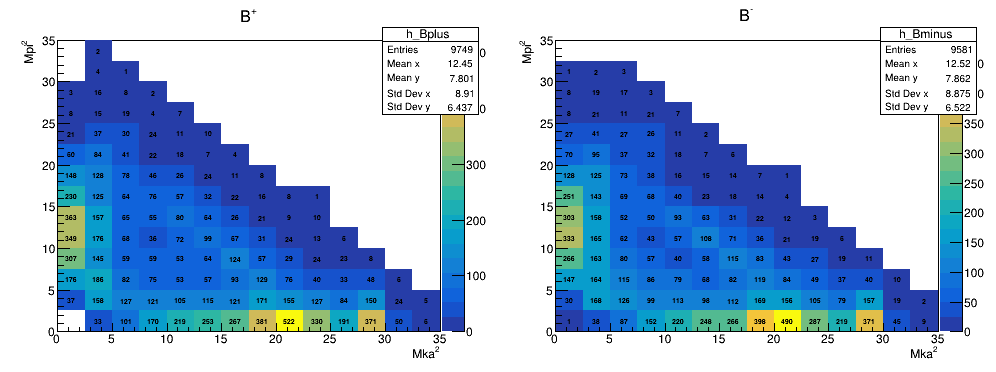

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [21]:
auto c1 = new TCanvas("c1","c1",1000,400);
c1->Divide(2,1);

// h_Bplus->SetStats(1);
// h_Bplus->SetStats(1);

c1->cd(1); h_Bplus->Draw("text COLZ");
c1->cd(2); h_Bminus->Draw("text COLZ");
c1->Draw()

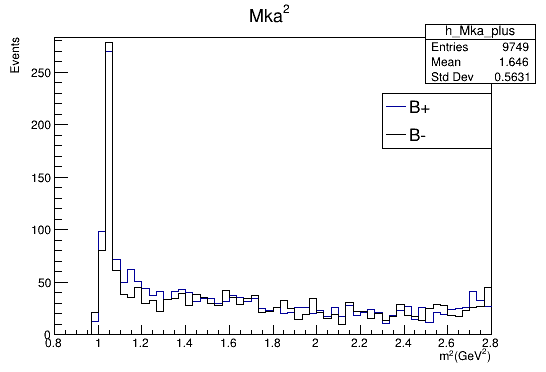

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


In [22]:
auto canvas = new TCanvas("canvas","canvas",550,400);  

h_MkaSQ_plus->Draw();
h_MkaSQ_minus->Draw("samehist");
h_MkaSQ_minus->SetLineColor(1);
TLegend *leg = new TLegend(0.7,0.6,0.9,0.75);
leg->AddEntry(h_MkaSQ_plus, "B+", "l"); leg->AddEntry(h_MkaSQ_minus, "B-", "l"); leg->Draw();

canvas->Draw();

# Asymmetry

# <div style="text-align:center"> $A = \frac{N^- - N^+}{N^- + N^+}$ </div>

# Statistical uncertainty

# <div style="text-align:center"> $\sigma_A = \sqrt{ \frac{1 - A^2}{N^- + N^+} }  $ </div>

The significance of the result, sigma, is found by dividing the value for asymmetry by its uncertainty. A value exceeding three sigma is considered "evidence" by particle physicists while a value of five sigma or more can be called an "observation" or "discovery"

#### Operating histograms

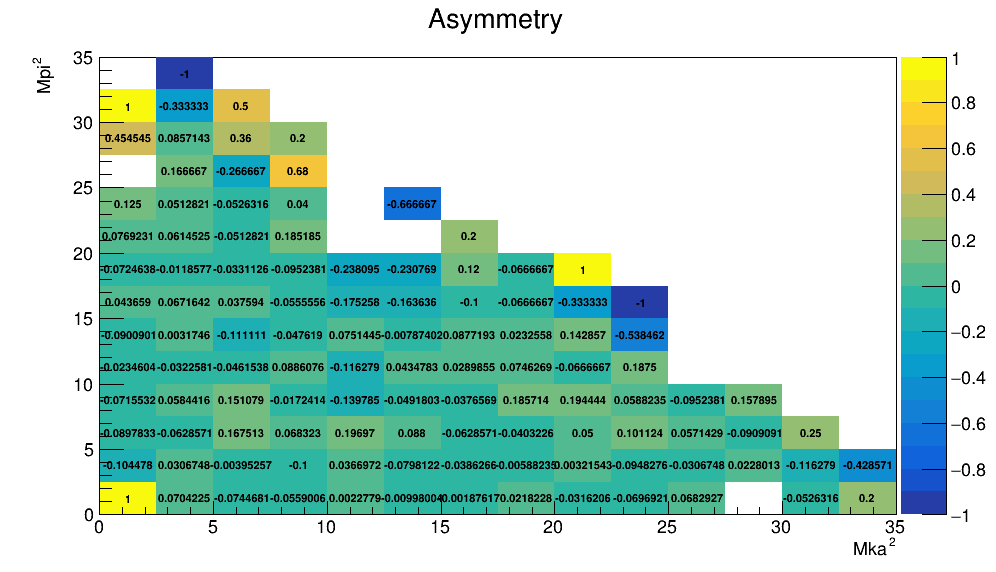

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [23]:
TH2F *Numerator = (TH2F*) h_Bminus->Clone();
TH2F *Denominator = (TH2F*) h_Bminus->Clone();
Numerator->Add(h_Bplus, -1);
Denominator->Add(h_Bplus, 1);

Numerator->Divide(Denominator);

TH2F *Asym = Numerator;
Asym->SetTitle("Asymmetry");

TCanvas *canvas = new TCanvas("Canvas","",1000,600);
Asym->SetStats(0);
Asym->Draw("text colz1");
canvas->Draw();

#### Re-setting bin content

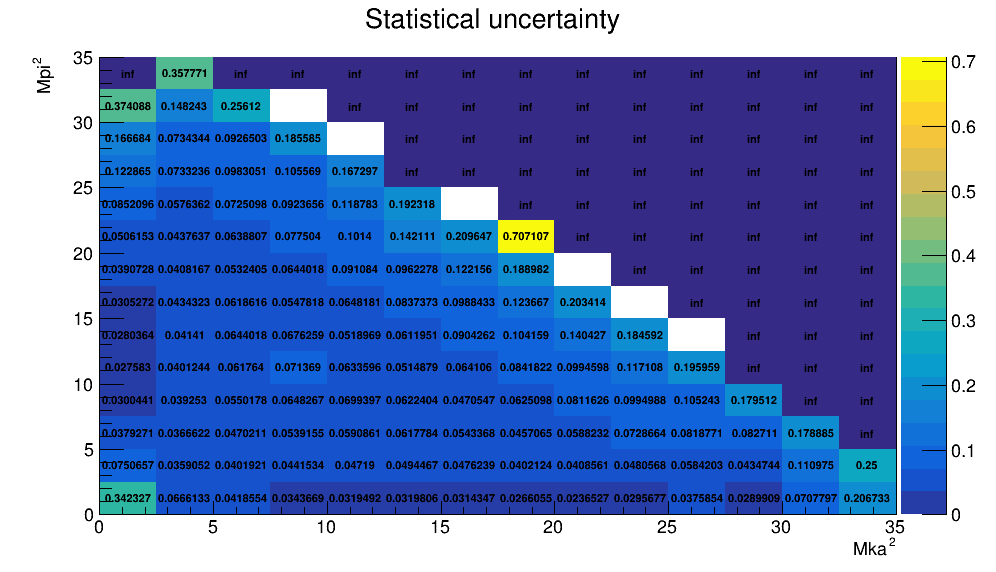

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [16]:
TH2F *Uncertainty = Asym;
Uncertainty->SetTitle("Statistical uncertainty");

for (int bin=0; bin<=Asym->GetNcells(); ++bin) {
    double binAsym = Uncertainty->GetBinContent(bin);
    double binDenom = Denominator->GetBinContent(bin);
    Uncertainty->SetBinContent(bin, sqrt( (1 - binAsym*binAsym) / binDenom ));
}
    
TCanvas *canvas = new TCanvas("Canvas","",1000,600);
Uncertainty->SetStats(0);
Uncertainty->Draw("text colz");
canvas->Draw();